In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [27]:
df_train_path=r'D:\computer vision practice code\all projects ml\image classification deep learning veg-fruit\fruits-veg\train'
df_test_path=r'D:\computer vision practice code\all projects ml\image classification deep learning veg-fruit\fruits-veg\test'
df_validation_path=r'D:\computer vision practice code\all projects ml\image classification deep learning veg-fruit\fruits-veg\validation'

In [28]:
img_width=180
img_height=180

In [29]:
data_train=tf.keras.utils.image_dataset_from_directory(
    df_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 561 files belonging to 2 classes.


In [30]:
data_classs=data_train.class_names

In [31]:
data_classs

['fresh_peaches_done', 'fresh_pomegranates_done']

In [32]:
data_val=tf.keras.utils.image_dataset_from_directory(
    df_validation_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 594 files belonging to 2 classes.


In [33]:
data_vals=data_val.class_names

In [34]:
data_vals

['rotten_peaches_done', 'rotten_strawberries_done']

In [35]:
data_test=tf.keras.utils.image_dataset_from_directory(
    df_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 500 files belonging to 2 classes.


In [36]:
data_tests=data_test.class_names

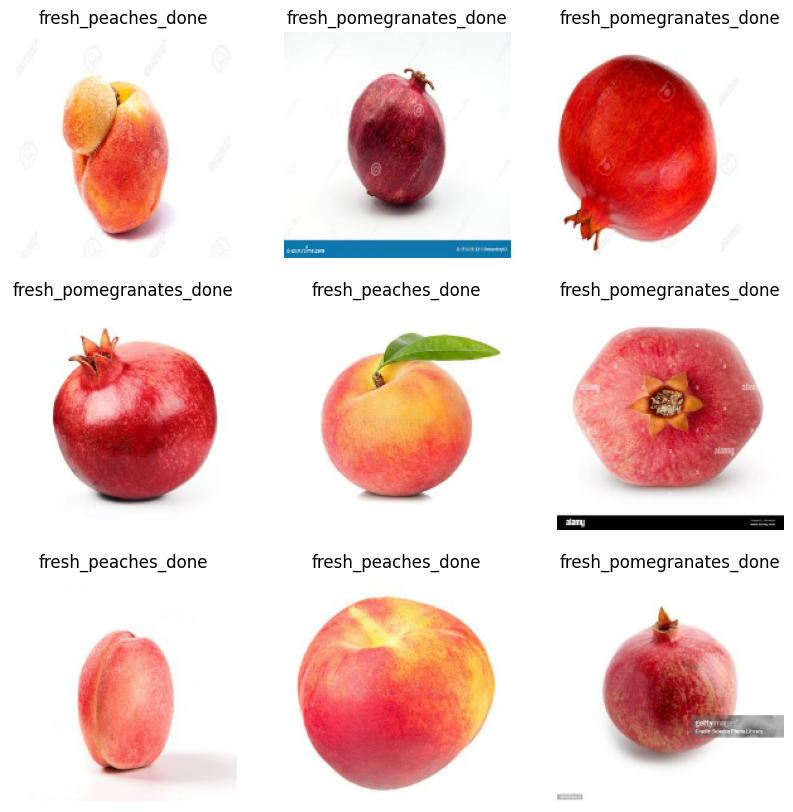

In [37]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_classs[labels[i]])
        plt.axis('off')

In [38]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
input_shape=(180,180,3)
model= Sequential([
layers.Rescaling(1./255),
layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=input_shape),
layers.MaxPooling2D(2,2),
layers.Conv2D(32,(3,3),padding='same',activation='relu'),
layers.MaxPooling2D(2,2),
layers.Conv2D(64,(3,3),padding='same',activation='relu'),
layers.MaxPooling2D(2,2),
layers.Flatten(),
layers.Dropout(0.2),
layers.Dense(128),
layers.Dense(units=len(data_classs),activation='softmax'),
])

c:\Users\Ghufran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
data_val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
epoch_size=25
model.fit(data_train,validation_data=data_val,batch_size=32,epochs=epoch_size)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.5421 - loss: 5.0827 - val_accuracy: 0.6347 - val_loss: 0.6377
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.7639 - loss: 0.5081 - val_accuracy: 0.6886 - val_loss: 0.5533
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.8775 - loss: 0.2917 - val_accuracy: 0.6667 - val_loss: 0.6749
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.8862 - loss: 0.2609 - val_accuracy: 0.6347 - val_loss: 0.6597
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.9080 - loss: 0.2304 - val_accuracy: 0.6094 - val_loss: 0.9476
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.8946 - loss: 0.2422 - val_accuracy: 0.6785 - val_loss: 0.6236
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.9377 - loss: 0.1792 - val_accuracy: 0.6414 - val_loss: 0.8799
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step - accuracy: 0.9084 - loss: 0.2165 - val_accuracy: 0.

In [43]:
model.history.history

{'accuracy': [0.5614973306655884,
  0.7932263612747192,
  0.8752228021621704,
  0.8877005577087402,
  0.8983957171440125,
  0.9073083996772766,
  0.9251337051391602,
  0.9180035591125488,
  0.9429590106010437,
  0.9411764740943909,
  0.9572192430496216,
  0.9518716335296631,
  0.9607843160629272,
  0.9821746945381165,
  0.9803921580314636,
  0.9679144620895386,
  0.976827085018158,
  0.9893048405647278,
  0.9928698539733887,
  0.9964349269866943,
  0.9661319255828857,
  0.9750445485115051,
  0.987522304058075,
  0.9910873174667358,
  0.9893048405647278],
 'loss': [3.0627903938293457,
  0.4585799276828766,
  0.2853868305683136,
  0.270856648683548,
  0.242350772023201,
  0.21148061752319336,
  0.18879039585590363,
  0.19585950672626495,
  0.1589341014623642,
  0.15430952608585358,
  0.11503663659095764,
  0.11272633075714111,
  0.09120433032512665,
  0.06866788864135742,
  0.05550698563456535,
  0.07638160139322281,
  0.0639476627111435,
  0.03311235457658768,
  0.03416741266846657,
  0

Text(0.5, 1.0, 'Loss')

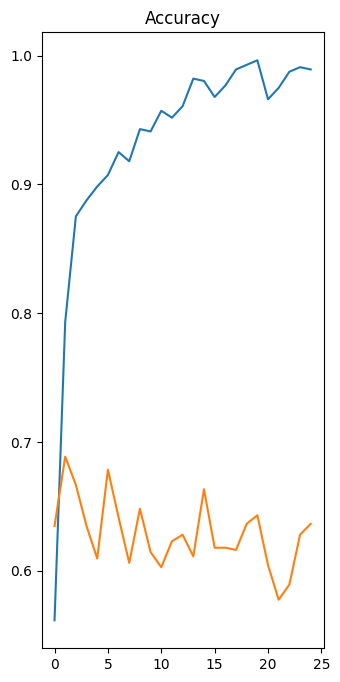

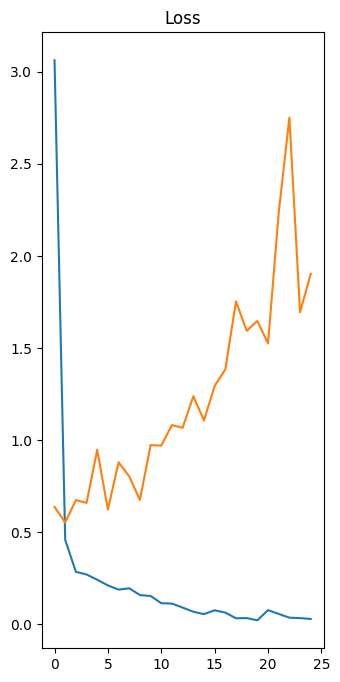

In [44]:
epoch_range=range(epoch_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,model.history.history['accuracy'],label='Training Accuracy')
plt.plot(epoch_range,model.history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')


epoch_range=range(epoch_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epoch_range,model.history.history['loss'],label='Training loss')
plt.plot(epoch_range,model.history.history['val_loss'],label='Validation loss')
plt.title('Loss')


In [51]:
img=r'D:\computer vision practice code\all projects ml\image classification deep learning veg-fruit\Chilli.jpg'
# img='Apple.jpg'
img=tf.keras.utils.load_img(img,target_size=(img_width,img_height))
img_arr=tf.keras.utils.array_to_img(img)
img_batch=tf.expand_dims(img_arr,0)

In [52]:
predict=model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [53]:
score=tf.nn.softmax(predict)

In [54]:
print('veg/fruits is accuracy score this is high ',format(data_classs[np.argmax(score)]),np.max(score)*100)

veg/fruits is accuracy score this is high  fresh_pomegranates_done 73.10585379600525


In [49]:
model.save('image_classify.keras')

In [50]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [55]:
data_classs

['fresh_peaches_done', 'fresh_pomegranates_done']